<a href="https://colab.research.google.com/github/sahiser19/ST-554-Project1-Sarah_Ryan_Heather/blob/Task-2---Ryan/Project1_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ST 554 Project 1: Task 2

Ryan Mersereau

This colab notebook is for conducting an extensive Exploratory Data Analysis (EDA) to understand the relationships sensor and weather
variables have with the pollutant measurement C6H6(GT) (benzene).

## Reading in Data

We'll use the air quality data found at the UCI machine learning repository, let's read it in below!

In [17]:
# Importing necessary packages
#!pip install ucimlrepo
import ucimlrepo as uci
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in data
air_quality = uci.fetch_ucirepo(id=360)
air_quality.data.features.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


This data is time series data collected from March 2004 to February 2005 in Italy, and contains measurements of pollutants and weather associated with the measurements at that time. There are several columns recording different pollutant concentrations.

Specifically, we want to investigate C6H6 as the response, which is the True hourly averaged Benze concentration in micrograms, as stated [here](https://https://archive.ics.uci.edu/dataset/360/air+quality)

In [32]:
air_quality.data.features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


## Data Cleaning and manipulation

We are told to ignore the rest of the 'true' variables, which are  gold standard measurements of pollutants in the air. These are indacted by column names ending with (GT), so let's make a new dataframe excluding these columns by subsetting the dataframe created above.

In [6]:
air_df = air_quality.data.features.drop(columns = air_quality.data.features.columns[[2, 4, 7, 9]])


We can then call this new dataframe and verify columns are dropped!

In [7]:
air_df

,Date,Time,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,1360,11.9,1046,1056,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,1292,9.4,955,1174,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,1402,9.0,939,1140,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,1376,9.2,948,1092,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1272,6.5,836,1205,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,1314,13.5,1101,539,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,1163,11.4,1027,604,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,1142,12.4,1063,603,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,1003,9.5,961,702,1041,770,28.3,13.5,0.5139


As stated on the dataset website, missing values are tagged with a -200 value. Therefore, we want to exclude any rows containing -200 options.

First, lets see how many -200 or missing values there are.

In [8]:
(air_df == -200).sum()

,0
Date,0
Time,0
PT08.S1(CO),366
C6H6(GT),366
PT08.S2(NMHC),366
PT08.S3(NOx),366
PT08.S4(NO2),366
PT08.S5(O3),366
T,366
RH,366


There appear to be 366 rows with missing data. Dropping these shouldn't be an issue since our original data set is over 9,000 observations.

We can do this by converting -200 cells to NaN values with `replace()`, and then using `.dropna()` to drop rows with na values. This will give us data with no missing values that will be more accurate and reliable for generating things like summary statistics.

In [9]:
air_df.replace(-200, np.nan, inplace = True)
air_df.dropna(inplace = True)
air_df

,Date,Time,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,1314.0,13.5,1101.0,539.0,1374.0,1729.0,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,1163.0,11.4,1027.0,604.0,1264.0,1269.0,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,1142.0,12.4,1063.0,603.0,1241.0,1092.0,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,1003.0,9.5,961.0,702.0,1041.0,770.0,28.3,13.5,0.5139


Now we can get started with data analysis!

## Numerical Summaries (WIP)

Let's begin by investigating numeric summaries of our response variable C6H6(GT) at different levels/combinations of other variables

In [37]:
air_df.loc[:, "PT08.S1(CO)":"AH"].describe()

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,1099.833166,10.083105,939.153376,835.493605,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,217.080037,7.449820,266.831429,256.817320,346.206794,398.484288,8.832116,17.316892,0.403813
min,647.000000,0.100000,383.000000,322.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,937.000000,4.400000,734.500000,658.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1063.000000,8.200000,909.000000,806.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,1231.000000,14.000000,1116.000000,969.500000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,2040.000000,63.700000,2214.000000,2683.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


(array([ 20.,  97., 422., 479., 592., 743., 898., 919., 733., 878., 727.,
        744., 538., 343., 254., 233., 186., 124.,  51.,  10.]),
 array([-1.9  ,  0.425,  2.75 ,  5.075,  7.4  ,  9.725, 12.05 , 14.375,
        16.7  , 19.025, 21.35 , 23.675, 26.   , 28.325, 30.65 , 32.975,
        35.3  , 37.625, 39.95 , 42.275, 44.6  ]),
 <BarContainer object of 20 artists>)

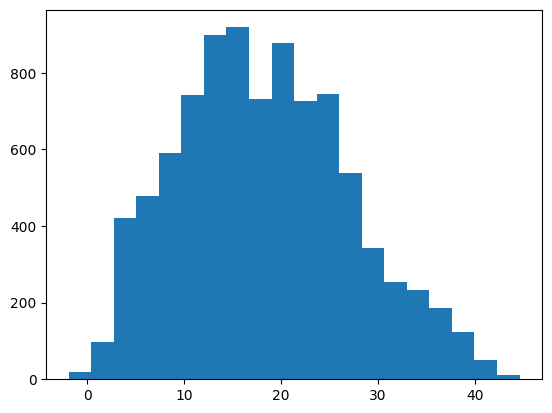

In [19]:
plt.hist(air_df["T"], bins = 20)

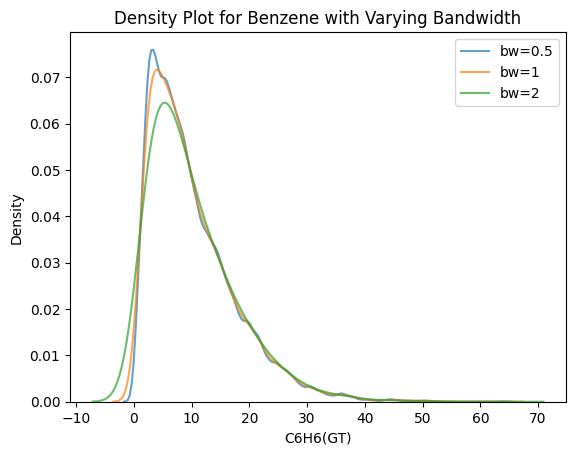

In [45]:
sns.kdeplot(air_df['C6H6(GT)'], bw_adjust=0.5,alpha=0.7, label='bw=0.5')
sns.kdeplot(air_df['C6H6(GT)'], bw_adjust=1, alpha=0.7, label='bw=1')
sns.kdeplot(air_df['C6H6(GT)'], bw_adjust=2, alpha=0.7, label='bw=2')

plt.xlabel('C6H6(GT)')
plt.ylabel('Density')
plt.title('Density Plot for Benzene with Varying Bandwidth')
plt.legend()
plt.show()

In [ ]:
# -5 to 5 = Very cold
# 5 to 15 = Chilly
# 15 to 25 = Nice
# 25 to 35 = Hot
# 35 to 45 = Very Hot

# Categories by season (From Date) : MM/DD/YY

# By time of day

# Sensor grouping, create categories based on these variables' ranges!


In [29]:
# C6H6(GT) by hour
air_df["Hour"] = air_df["Datetime"].dt.hour
hourly_mean = air_df.groupby("Hour")["C6H6(GT)"].mean()
print(hourly_mean)

Hour
0      7.684140
1      5.991711
2      4.379467
3      3.379255
4      2.916711
5      3.068435
6      4.756117
7     10.398936
8     15.894149
9     14.760317
10    12.237666
11    11.018085
12    10.824138
13    10.980637
14    10.316310
15    10.267914
16    11.118499
17    13.942857
18    16.639678
19    17.735580
20    15.384450
21    11.089008
22     8.977748
23     8.412634
Name: C6H6(GT), dtype: float64


In [33]:
air_df.groupby("Hour")["C6H6(GT)"].std()

,C6H6(GT)
Hour,
0,3.921664
1,3.170991
2,2.561266
3,2.228278
4,1.991421
5,1.935430
6,2.768897
7,7.823343
8,9.829296


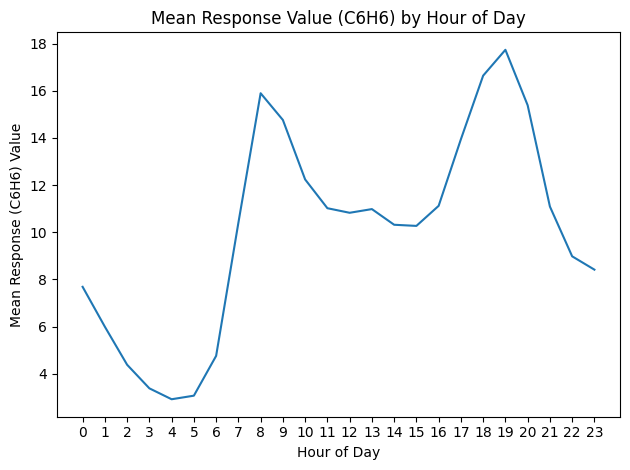

In [31]:
plt.plot(hourly_mean.index, hourly_mean.values)
plt.xlabel('Hour of Day')
plt.ylabel('Mean Response (C6H6) Value')
plt.title('Mean Response Value (C6H6) by Hour of Day')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

(array([3.497e+03, 2.899e+03, 1.510e+03, 7.000e+02, 2.540e+02, 9.200e+01,
        2.200e+01, 1.500e+01, 1.000e+00, 1.000e+00]),
 array([ 0.1 ,  6.46, 12.82, 19.18, 25.54, 31.9 , 38.26, 44.62, 50.98,
        57.34, 63.7 ]),
 <BarContainer object of 10 artists>)

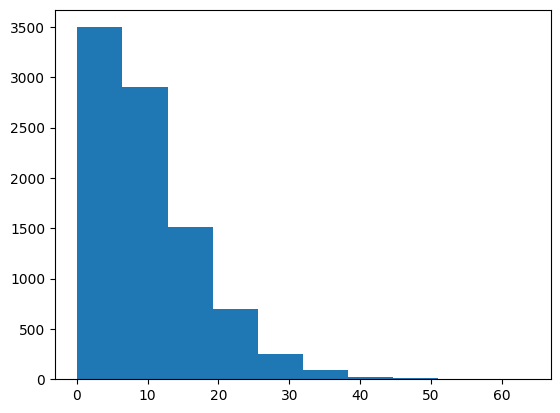

In [25]:
plt.hist(air_df["C6H6(GT)"])

## Correlation Investigation

Now, lets look at correlations between variables. That is, a quantitative measure of the relationship between two variables.

In [11]:
# Correlation matrix between all numeric variables
air_df[["PT08.S1(CO)", "C6H6(GT)", "PT08.S2(NMHC)", "PT08.S3(NOx)", "PT08.S4(NO2)", "PT08.S5(O3)", "T", "RH", "AH"]].corr()

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
PT08.S1(CO),1.000000,0.883795,0.892964,-0.771938,0.682881,0.899324,0.048627,0.114606,0.135324
C6H6(GT),0.883795,1.000000,0.981950,-0.735744,0.765731,0.865689,0.198956,-0.061681,0.167972
PT08.S2(NMHC),0.892964,0.981950,1.000000,-0.796703,0.777254,0.880578,0.241373,-0.090380,0.186933
PT08.S3(NOx),-0.771938,-0.735744,-0.796703,1.000000,-0.538468,-0.796569,-0.145112,-0.056740,-0.232017
PT08.S4(NO2),0.682881,0.765731,0.777254,-0.538468,1.000000,0.591144,0.561270,-0.032188,0.629641
PT08.S5(O3),0.899324,0.865689,0.880578,-0.796569,0.591144,1.000000,-0.027172,0.124956,0.070751
T,0.048627,0.198956,0.241373,-0.145112,0.561270,-0.027172,1.000000,-0.578621,0.656397
RH,0.114606,-0.061681,-0.090380,-0.056740,-0.032188,0.124956,-0.578621,1.000000,0.167971
AH,0.135324,0.167972,0.186933,-0.232017,0.629641,0.070751,0.656397,0.167971,1.000000


<Axes: xlabel='PT08.S1(CO)', ylabel='C6H6(GT)'>

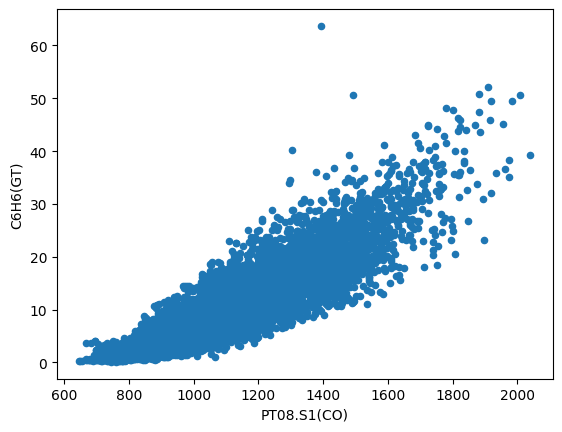

In [12]:
# Scatterplot between PT08.S1(CO) and C6H6(GT)
air_df.plot.scatter(x = "PT08.S1(CO)", y = "C6H6(GT)")


<Axes: xlabel='PT08.S1(CO)', ylabel='T'>

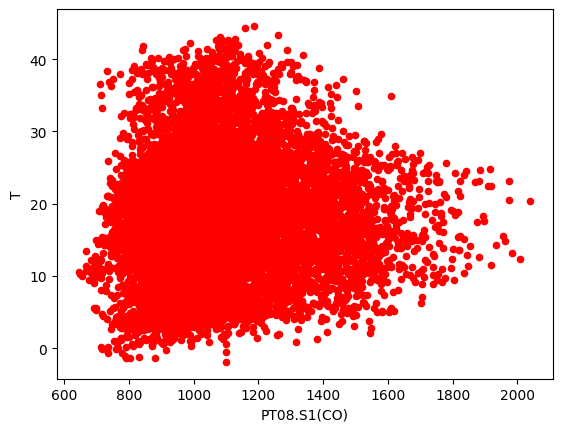

In [15]:
# Scatterplot between T and C6H6
air_df.plot.scatter(x = "PT08.S1(CO)", y = "T", c = "Red")

<Axes: xlabel='C6H6(GT)', ylabel='PT08.S2(NMHC)'>

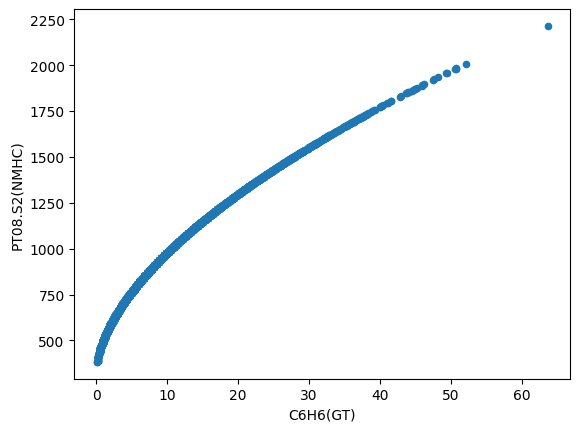

In [14]:
# Scatterplot between PT08.S2(NMHC) and C6H6
air_df.plot.scatter(x = "C6H6(GT)", y = "PT08.S2(NMHC)")

<Axes: xlabel='C6H6(GT)', ylabel='PT08.S3(NOx)'>

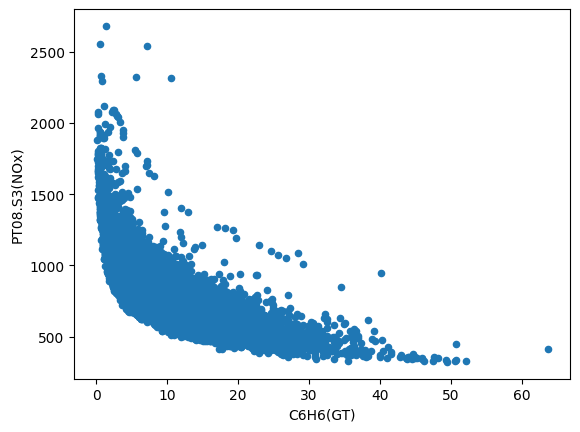

In [27]:
# Scatterplot between PT08.S3(NOx) and C6H6
air_df.plot.scatter(x = "C6H6(GT)", y = "PT08.S3(NOx)")

## Trends over time

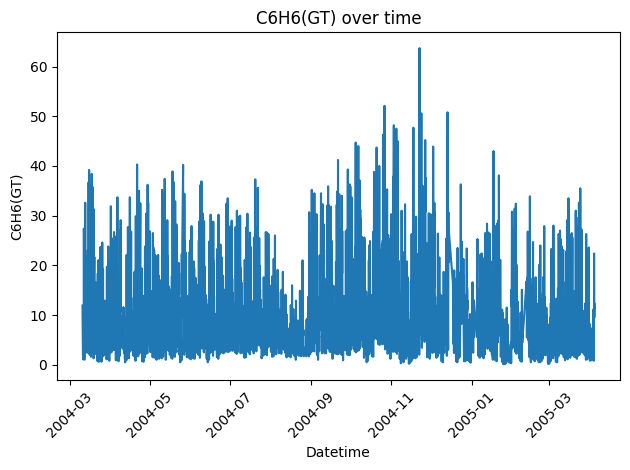

In [24]:
air_df["Datetime"] = pd.to_datetime(air_df["Date"].astype(str) + " " + air_df["Time"].astype(str), format = "%m/%d/%Y %H:%M:%S")
plt.plot(air_df["Datetime"], air_df["C6H6(GT)"])
plt.xlabel("Datetime")
plt.ylabel("C6H6(GT)")
plt.title("C6H6(GT) over time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

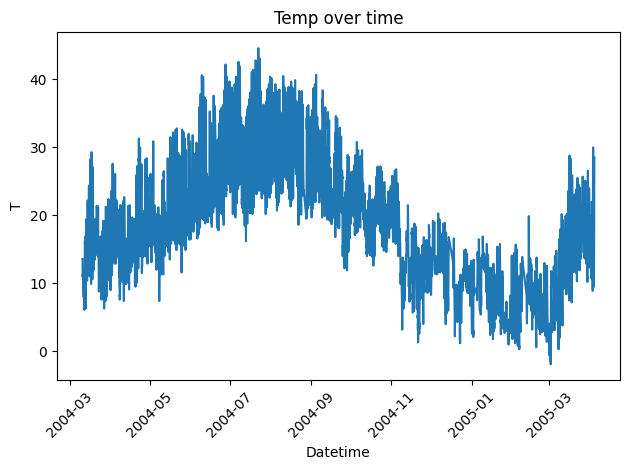

In [26]:
plt.plot(air_df["Datetime"], air_df["T"])
plt.xlabel("Datetime")
plt.ylabel("T")
plt.title("Temp over time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()